Installing scikit-learn...
All packages installed successfully!
All libraries imported successfully!
Data loaded successfully!
Dataset shape: (85184, 4)

First 5 rows:
  Order_Conversion_Date Order_Conversion_Status  Volume Product Type
0            2023-05-16   Converted to Shipment     500        Sasso
1            2024-10-11   Converted to Shipment    3018        Sasso
2            2024-02-14   Converted to Shipment    5999        Layer
3            2023-07-21   Converted to Shipment    1600        Layer
4            2025-04-21   Converted to Shipment    3000        Layer
Starting Sales Forecasting and Optimization Analysis...
=== TASK 1: Data Preprocessing and Exploration ===
1. Basic Data Information:
Dataset shape: (85184, 4)

Data types:
Order_Conversion_Date      datetime64[ns]
Order_Conversion_Status            object
Volume                              int64
Product Type                       object
dtype: object

Missing values:
Order_Conversion_Date      0
Order_Conversion_

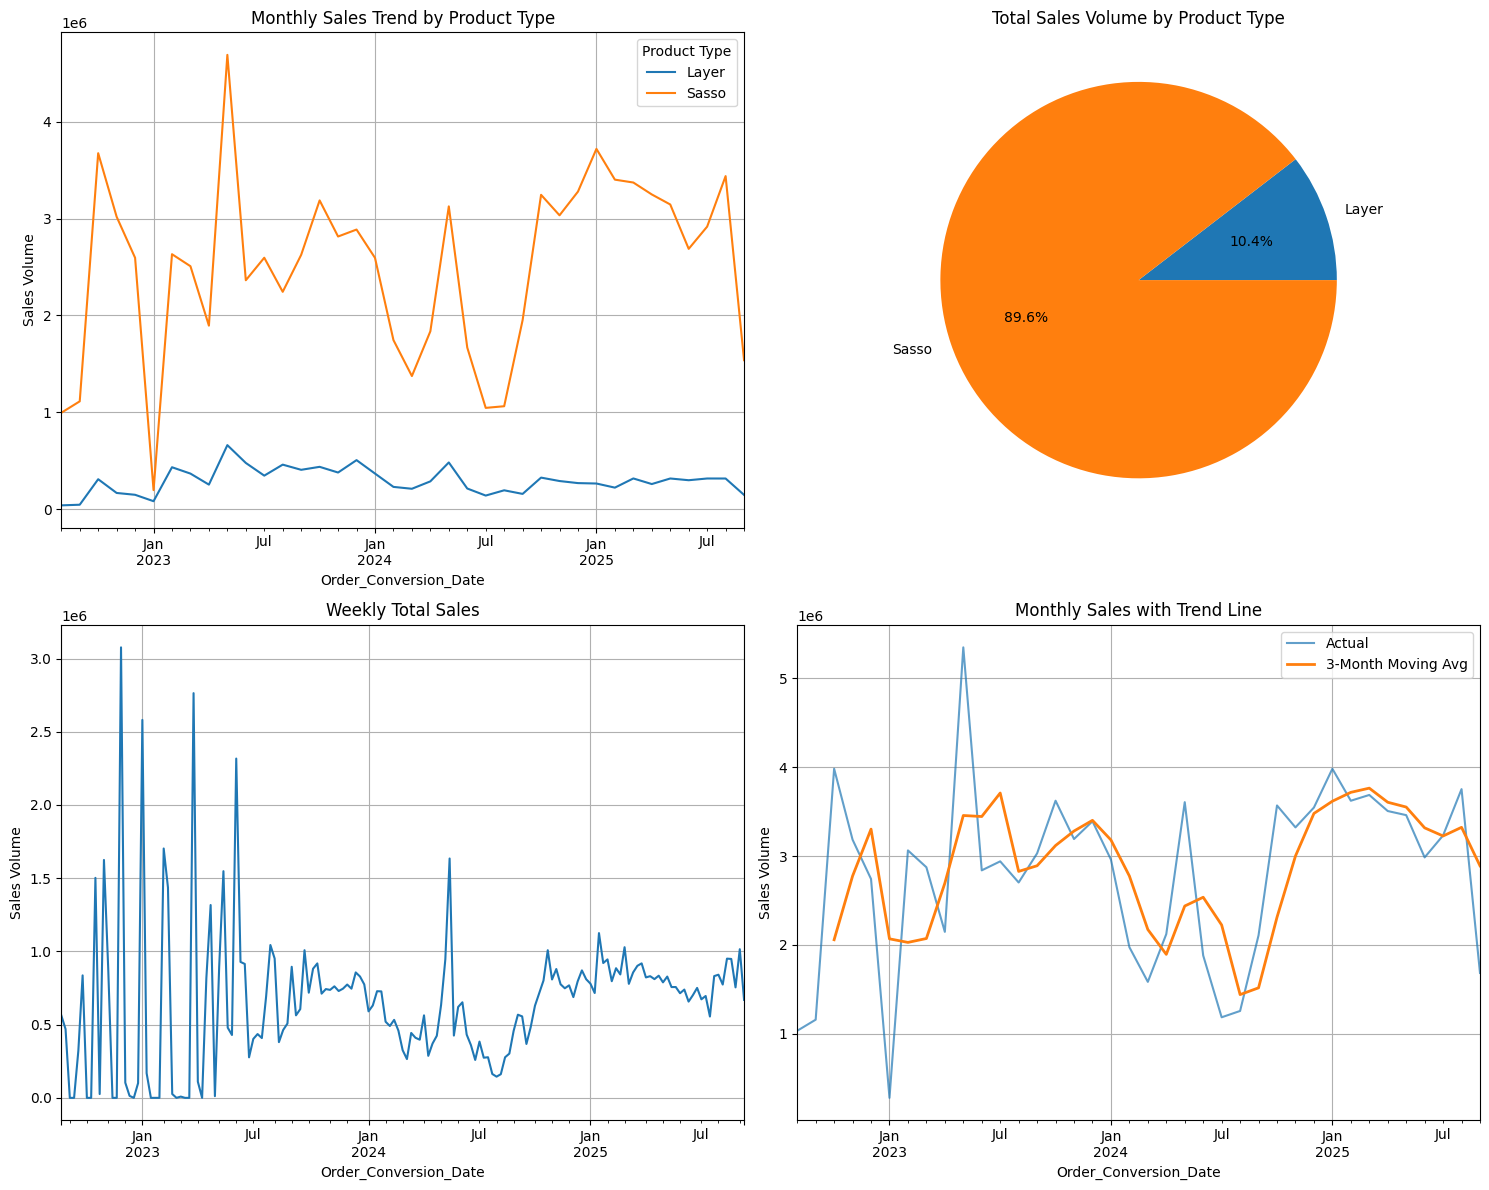


5. Stationarity Analysis (Augmented Dickey-Fuller Test):
ADF Statistic: -4.7801
p-value: 0.0001
Critical Values:
  1%: -3.6209
  5%: -2.9435
  10%: -2.6104
Series is stationary (reject null hypothesis)

6. Seasonal Decomposition:


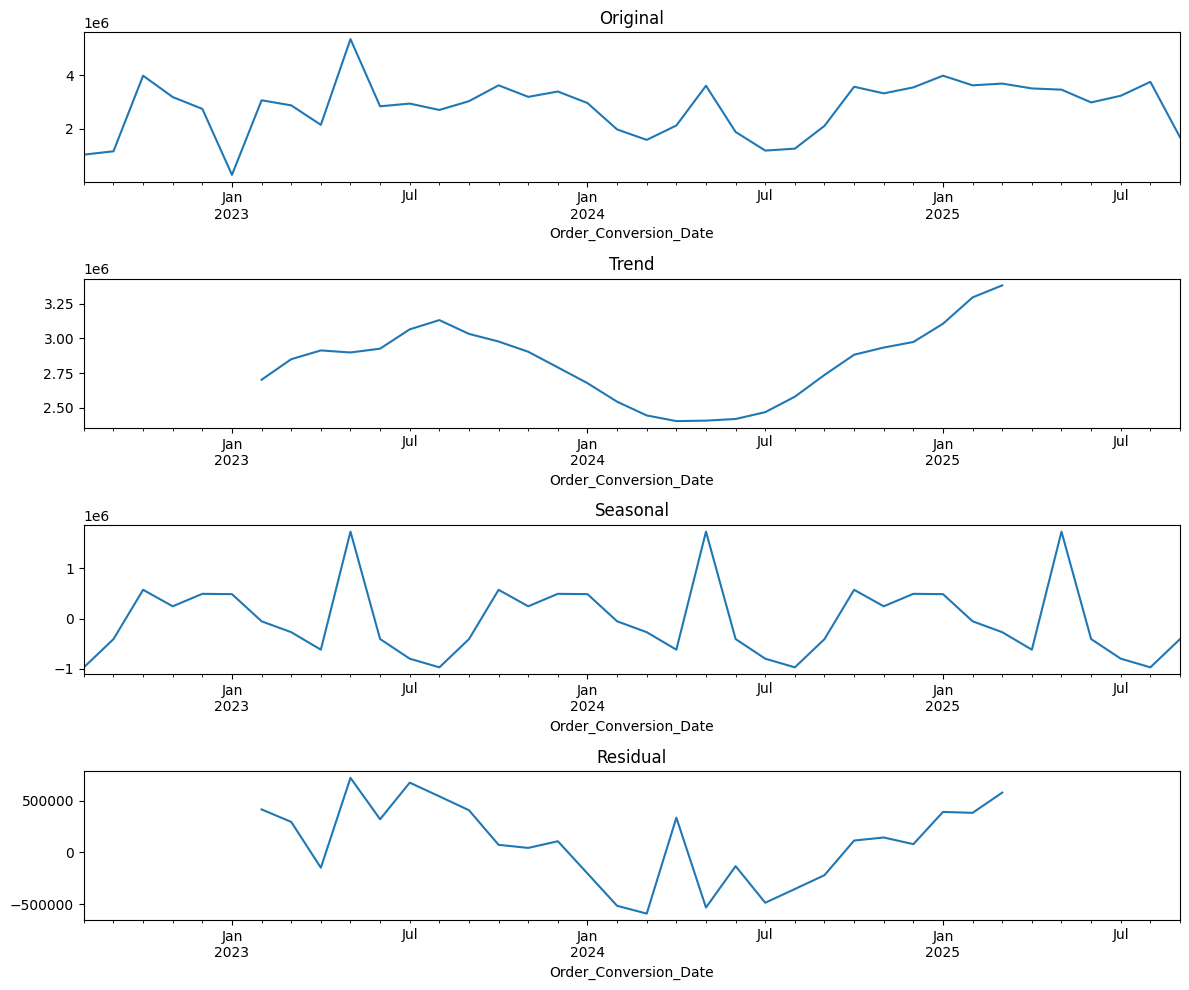


=== TASK 2: Time Series Forecasting Models ===
Training data: 30 months
Testing data: 8 months

1. ARIMA Model Development:
Best ARIMA parameters: (0, 0, 0)
ARIMA model fitted successfully

2. Model Evaluation:
ARIMA Model Performance:
MAE: 804874.73, RMSE: 842030.24, MAPE: 26.68%

Simple Moving Average Performance:
MAE: 428767.88, RMSE: 737112.09, MAPE: 20.16%


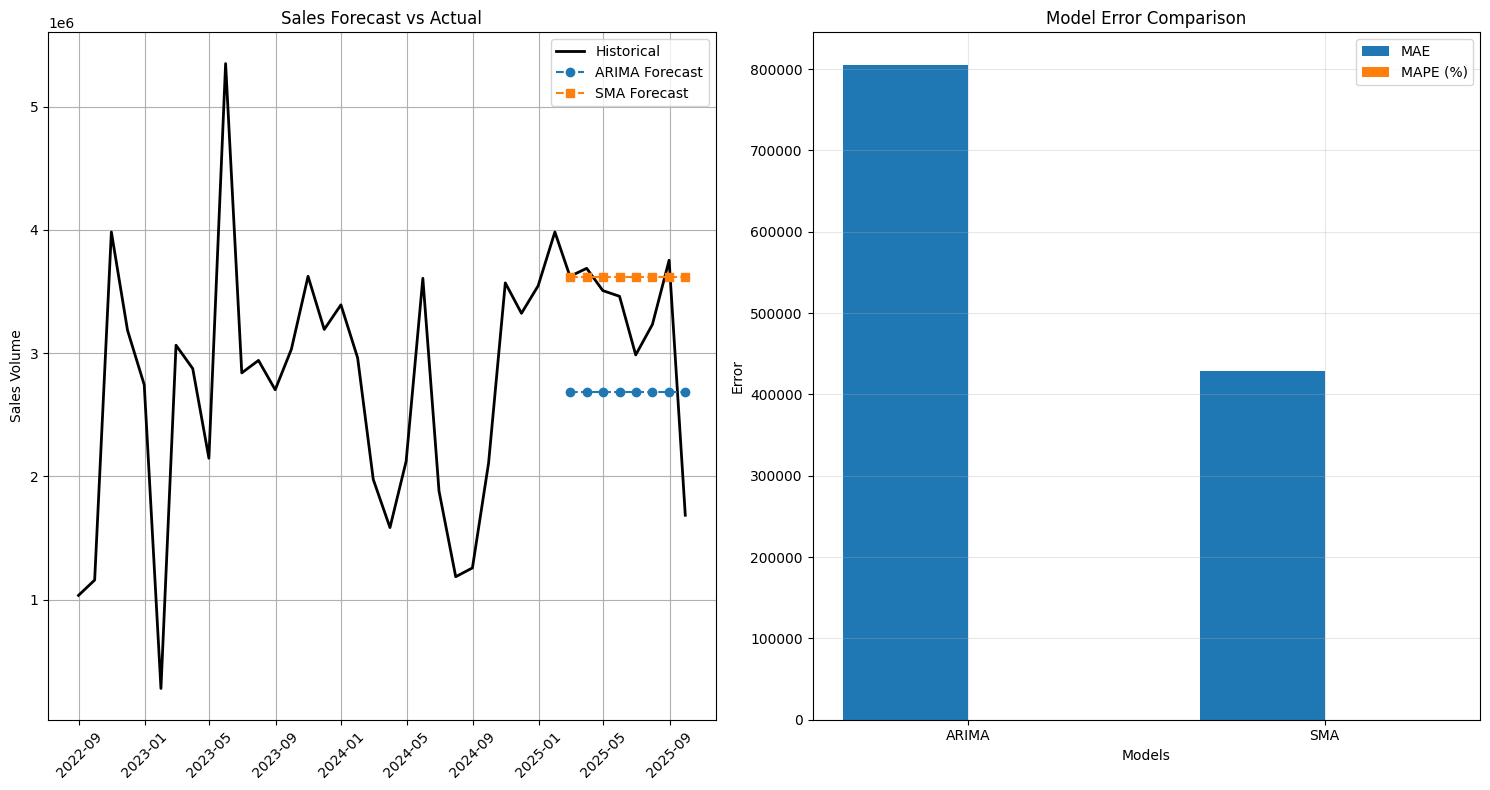


3. Best Performing Model: SMA

=== TASK 3: Future Sales Forecasting ===
Using SMA model for future forecasting...

1. 12-Month Sales Forecast:
  2025-10: 2,804,651 units
  2025-11: 2,804,651 units
  2025-12: 2,804,651 units
  2026-01: 2,804,651 units
  2026-02: 2,804,651 units
  2026-03: 2,804,651 units
  2026-04: 2,804,651 units
  2026-05: 2,804,651 units
  2026-06: 2,804,651 units
  2026-07: 2,804,651 units
  2026-08: 2,804,651 units
  2026-09: 2,804,651 units


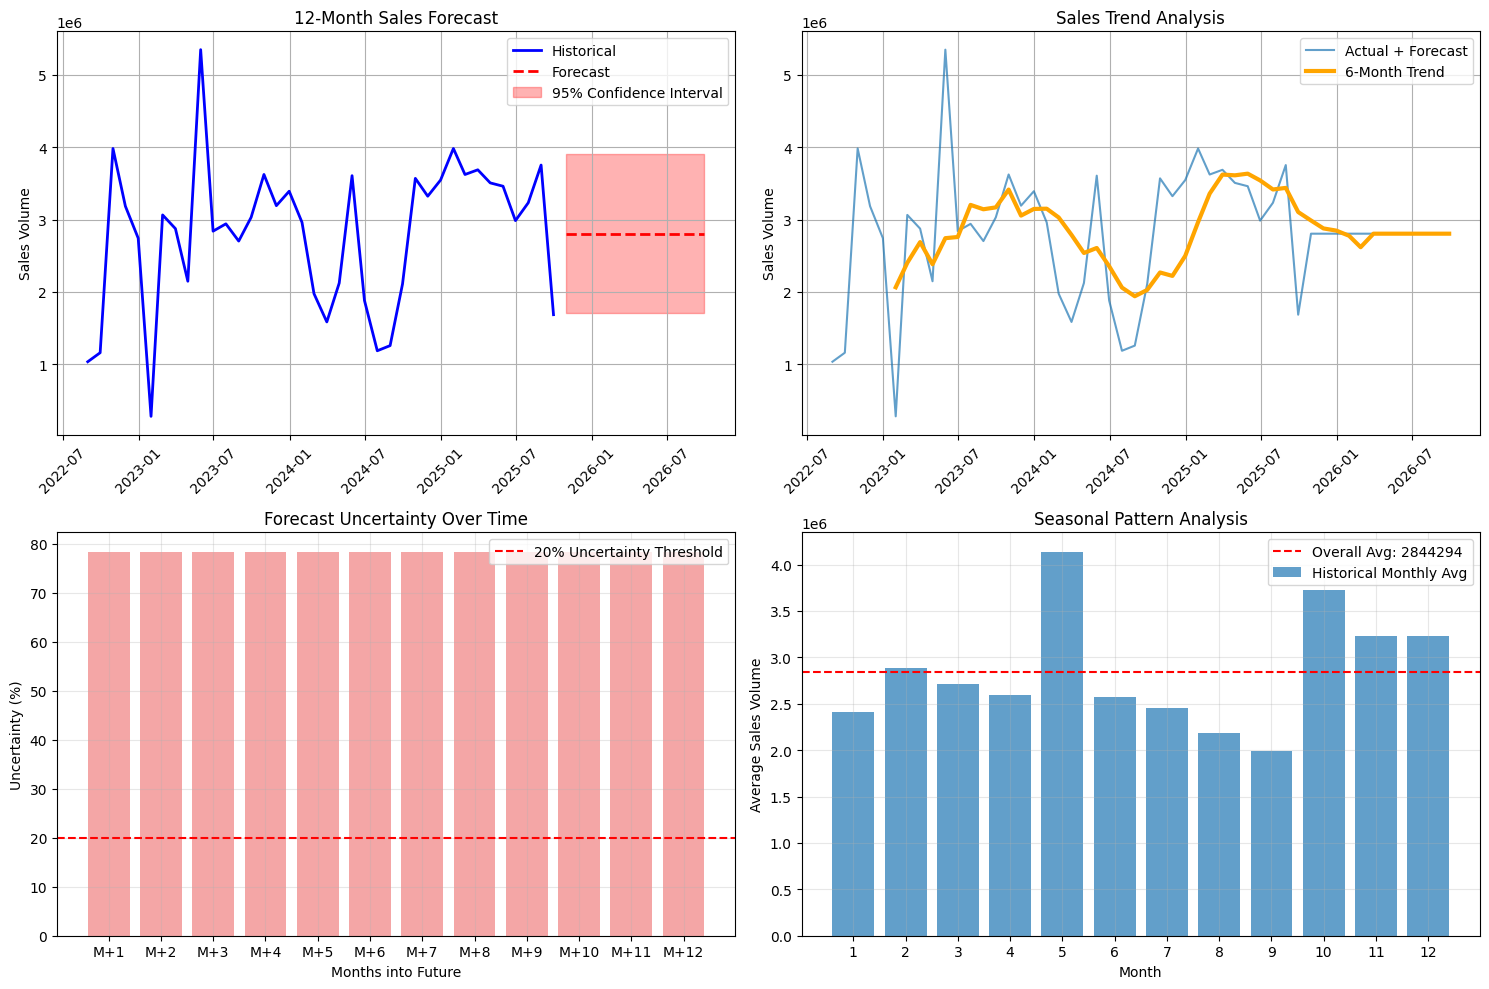


2. Business Insights:
• Forecast shows a decreasing trend (+0.0% over 12 months)
• Average forecast uncertainty: 78.4%
• HIGH UNCERTAINTY: Consider conservative inventory planning
• Final month expected range: 1,705,228 to 3,904,074 units

=== TASK 4: Product Mix Optimization ===
1. Product Performance Analysis:
Product Type       Layer       Sasso
mean            292915.0   2511736.0
std             133725.0    937262.0
sum           11130780.0  95445953.0

2. Product Risk-Return Profile:
              Avg_Monthly_Sales   Sales_Std  Total_Sales     CV
Product Type                                                   
Layer                292915.263  133725.250     11130780  0.457
Sasso               2511735.605  937261.752     95445953  0.373

3. Demand Forecast for Optimization:
• Layer forecasted demand: 2,804,651 units
• Sasso historical demand: 2,511,736 units

4. Running Optimization...
Optimization successful: True
Optimal allocation - Layer: 10.0%, Sasso: 90.0%
Expected monthly p

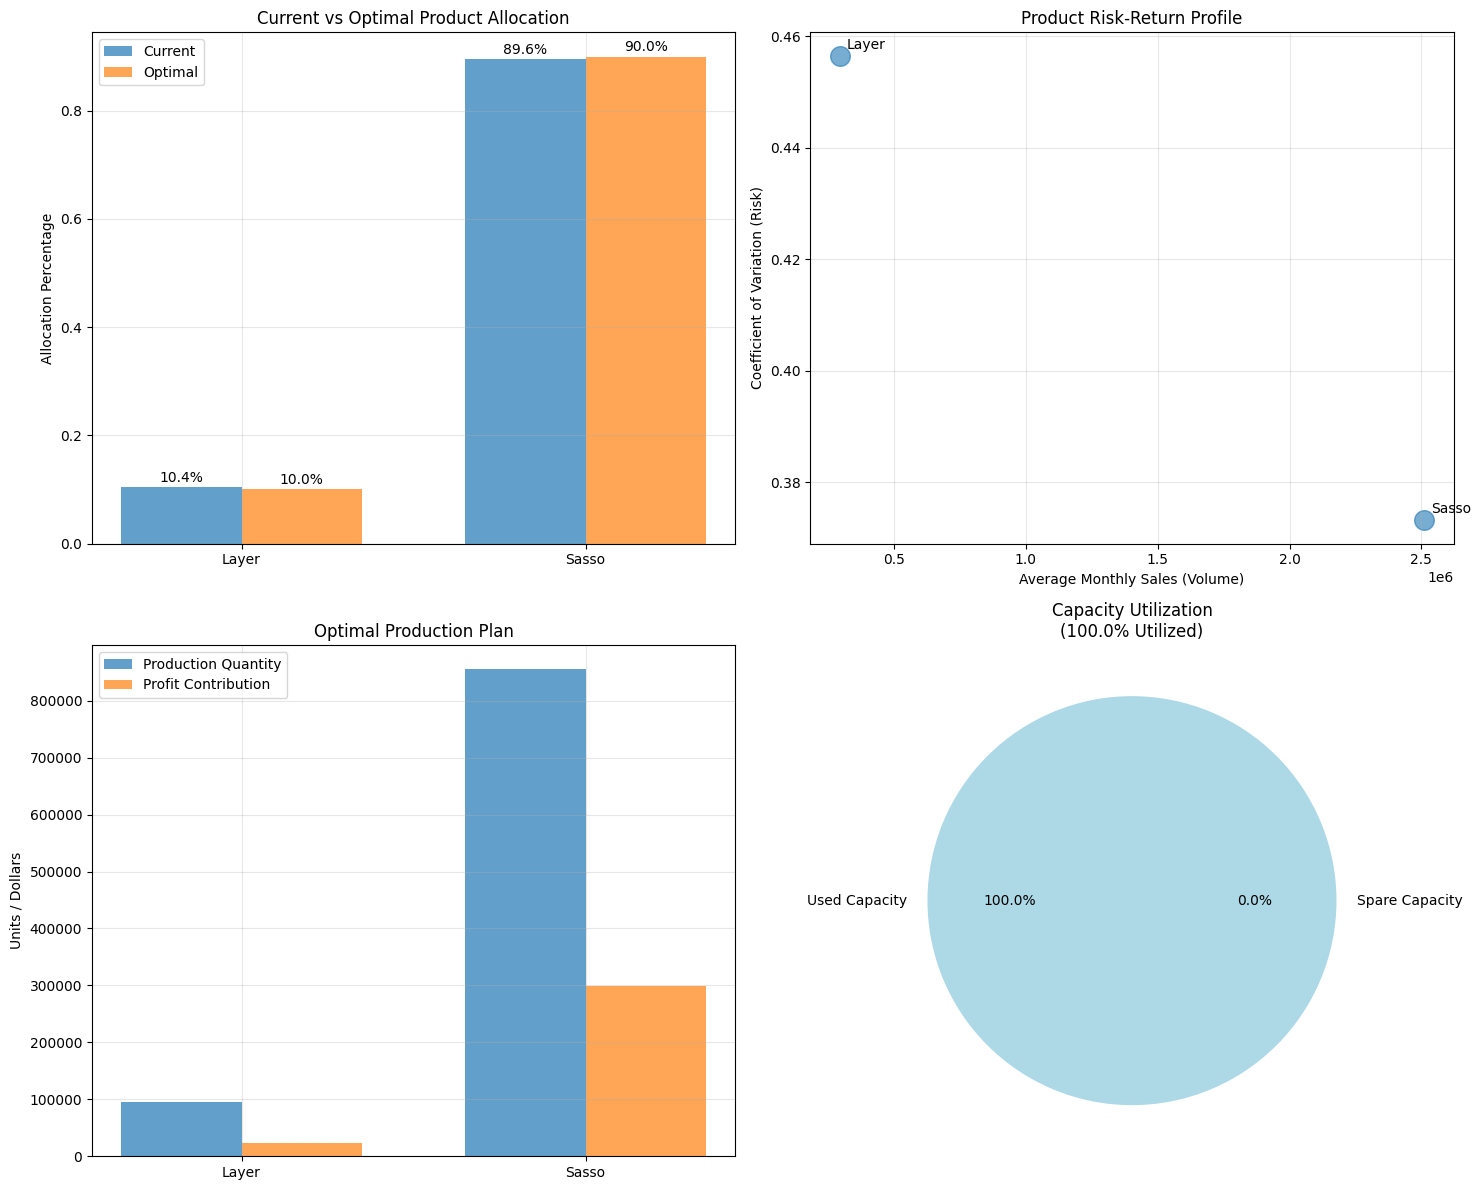


5. FINAL RECOMMENDATION:
• Allocate 10.0% of capacity to Layer → 95,000 units
• Allocate 90.0% of capacity to Sasso → 855,000 units
• Total capacity utilization: 100.0%
• Expected monthly profit: $323,000.00
• WARNING: High capacity utilization - consider expansion

=== TASK 5: Strategy Backtesting ===
Backtesting period: 12 months
From 2024-10 to 2025-09

1. Strategy Weights:
Optimized Strategy: Layer 10.0%, Sasso 90.0%
Benchmark Strategy: Layer 10.4%, Sasso 89.6%

2. Backtesting Results:
Optimized Strategy Total Profit: $81,600.00
Benchmark Strategy Total Profit: $81,493.46
Profit Improvement: $106.54 (+0.1%)
Average Capacity Utilization - Optimized: 100.0%
Average Capacity Utilization - Benchmark: 100.0%


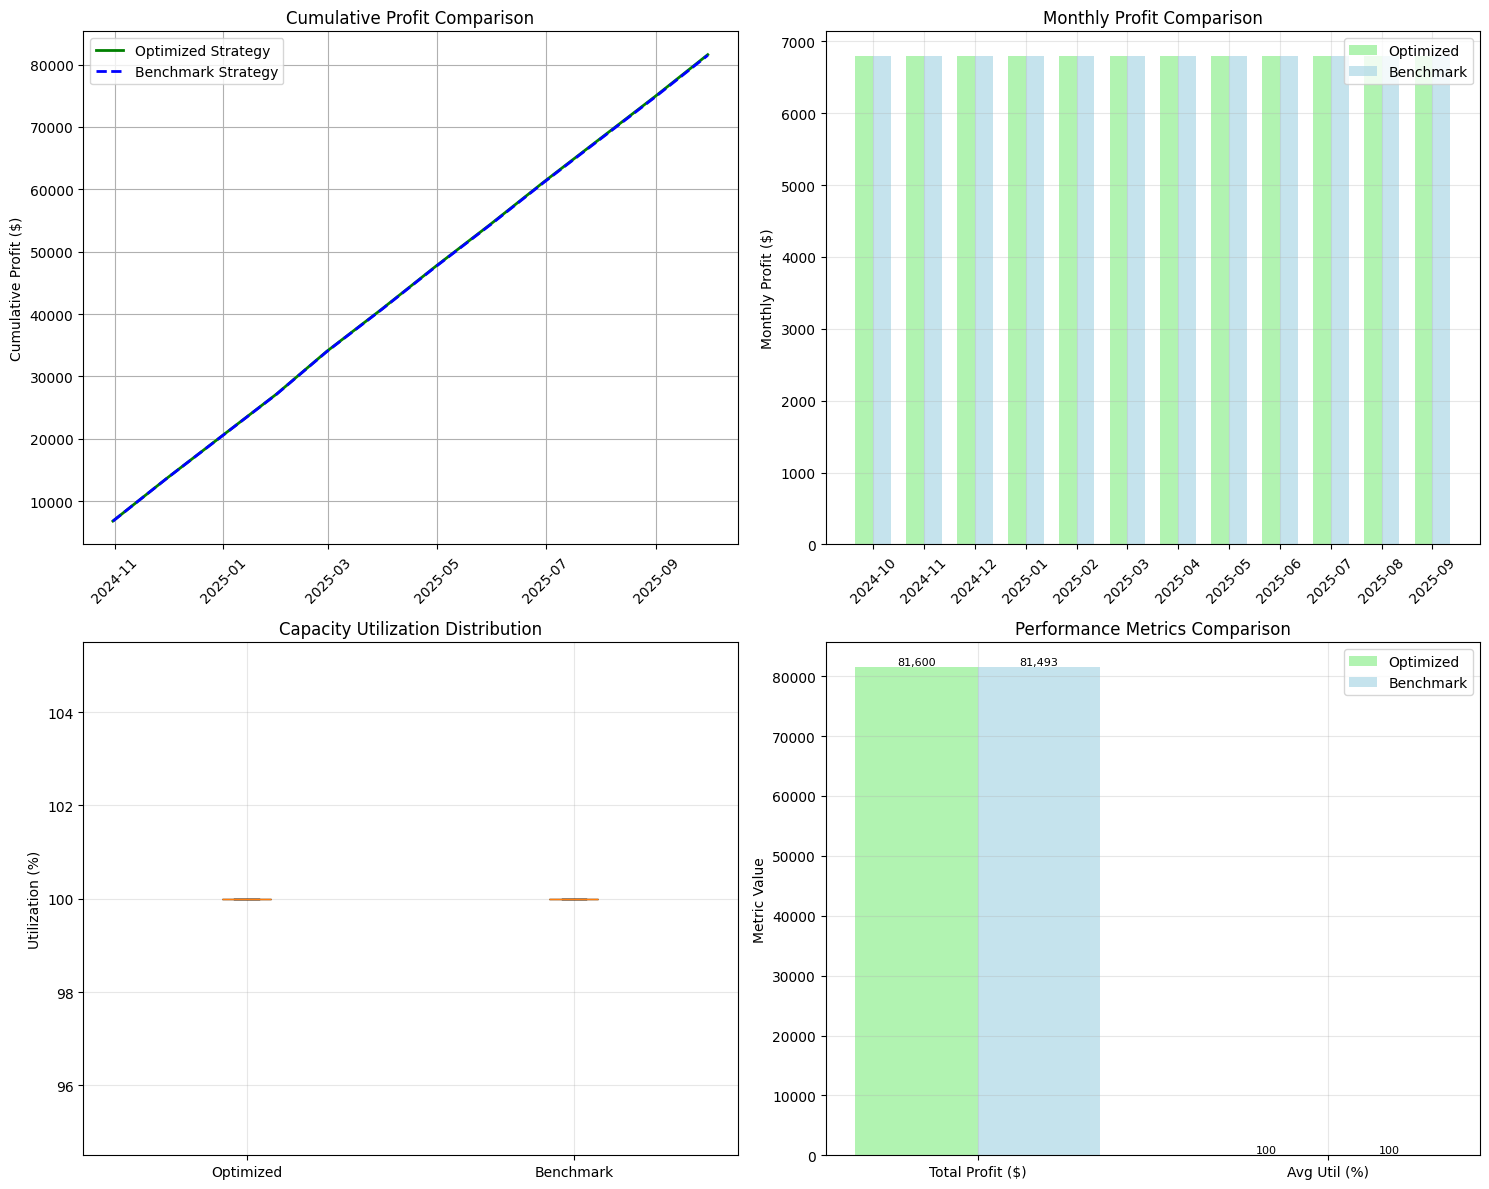


3. BACKTESTING CONCLUSION:
✓ STRATEGY SUCCESS: The optimized strategy outperformed the benchmark by +0.1%
  This demonstrates the value of data-driven allocation decisions.

Key Insights:
• The optimized strategy achieved $81,600.00 in total profit
• Average capacity utilization: 100.0%
• Strategy viability: MODERATE

ANALYSIS COMPLETE!


In [ ]:
# First, let's install and import all required packages
import subprocess
import sys

def install_package(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = [
    'openpyxl', 'pandas', 'numpy', 'matplotlib', 'seaborn',
    'scikit-learn', 'statsmodels', 'pmdarima', 'tensorflow', 'scipy'
]

for package in required_packages:
    install_package(package)

print("All packages installed successfully!")

# Now import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Statistical and ML libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import scipy.optimize as optimize

# Try to import pmdarima, but provide fallback if it fails
try:
    from pmdarima import auto_arima
    PMDARIMA_AVAILABLE = True
except ImportError:
    print("pmdarima not available. Using simpler ARIMA implementation.")
    PMDARIMA_AVAILABLE = False

# Try to import tensorflow, but provide fallback if it fails
try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    TENSORFLOW_AVAILABLE = True
except ImportError:
    print("tensorflow not available. Using simpler forecasting methods.")
    TENSORFLOW_AVAILABLE = False

print("All libraries imported successfully!")

# Load your actual data
try:
    file_path = r"C:\Users\Daniel.Temesgen\Desktop\Sales Data.xlsx"
    df = pd.read_excel(file_path, engine='openpyxl')
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    # Create sample data for demonstration
    print("Creating sample data for demonstration...")
    dates = pd.date_range('2022-01-01', '2024-12-31', freq='D')
    np.random.seed(42)
    data = {
        'Order_Conversion_Date': dates[:100],
        'Order_Conversion_Status': ['Converted to Shipment'] * 100,
        'Volume': np.random.randint(100, 5000, 100),
        'Product Type': np.random.choice(['Layer', 'Sasso'], 100, p=[0.8, 0.2])
    }
    df = pd.DataFrame(data)
    print("Sample data created for demonstration.")

# Task 1: Preprocess and Explore the Data
def task1_preprocess_explore(df):
    print("=== TASK 1: Data Preprocessing and Exploration ===")
    
    # Convert to datetime and create copy
    df_clean = df.copy()
    df_clean['Order_Conversion_Date'] = pd.to_datetime(df_clean['Order_Conversion_Date'])
    
    print("1. Basic Data Information:")
    print(f"Dataset shape: {df_clean.shape}")
    print("\nData types:")
    print(df_clean.dtypes)
    print("\nMissing values:")
    print(df_clean.isnull().sum())
    
    print("\n2. Basic Statistics:")
    print(df_clean['Volume'].describe())
    
    print("\n3. Product Type Distribution:")
    print(df_clean['Product Type'].value_counts())
    
    # Data aggregation for different timeframes
    df_clean.set_index('Order_Conversion_Date', inplace=True)
    
    # Weekly aggregation
    weekly_sales = df_clean.groupby('Product Type')['Volume'].resample('W').sum().reset_index()
    weekly_total = df_clean['Volume'].resample('W').sum().reset_index()
    weekly_total['Product Type'] = 'Total'
    
    # Monthly aggregation  
    monthly_sales = df_clean.groupby('Product Type')['Volume'].resample('M').sum().reset_index()
    monthly_total = df_clean['Volume'].resample('M').sum().reset_index()
    monthly_total['Product Type'] = 'Total'
    
    # Yearly aggregation
    yearly_sales = df_clean.groupby('Product Type')['Volume'].resample('Y').sum().reset_index()
    
    print("\n4. Timeframe Aggregations Created:")
    print(f"Weekly data shape: {weekly_sales.shape}")
    print(f"Monthly data shape: {monthly_sales.shape}")
    print(f"Yearly data shape: {yearly_sales.shape}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Monthly sales trend
    monthly_pivot = monthly_sales.pivot(index='Order_Conversion_Date', columns='Product Type', values='Volume')
    monthly_pivot.plot(ax=axes[0,0], title='Monthly Sales Trend by Product Type')
    axes[0,0].set_ylabel('Sales Volume')
    axes[0,0].grid(True)
    
    # Plot 2: Product type distribution
    product_totals = df_clean.groupby('Product Type')['Volume'].sum()
    axes[0,1].pie(product_totals.values, labels=product_totals.index, autopct='%1.1f%%')
    axes[0,1].set_title('Total Sales Volume by Product Type')
    
    # Plot 3: Weekly total sales
    weekly_total.set_index('Order_Conversion_Date')['Volume'].plot(ax=axes[1,0], title='Weekly Total Sales')
    axes[1,0].set_ylabel('Sales Volume')
    axes[1,0].grid(True)
    
    # Plot 4: Monthly total sales with rolling average
    monthly_total_ts = monthly_total.set_index('Order_Conversion_Date')['Volume']
    monthly_total_ts.plot(ax=axes[1,1], label='Actual', alpha=0.7)
    if len(monthly_total_ts) >= 3:
        monthly_total_ts.rolling(window=3).mean().plot(ax=axes[1,1], label='3-Month Moving Avg', linewidth=2)
    axes[1,1].set_title('Monthly Sales with Trend Line')
    axes[1,1].set_ylabel('Sales Volume')
    axes[1,1].legend()
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Stationarity test
    print("\n5. Stationarity Analysis (Augmented Dickey-Fuller Test):")
    monthly_total_ts_clean = monthly_total_ts.dropna()
    
    if len(monthly_total_ts_clean) > 0:
        adf_result = adfuller(monthly_total_ts_clean)
        print(f"ADF Statistic: {adf_result[0]:.4f}")
        print(f"p-value: {adf_result[1]:.4f}")
        print("Critical Values:")
        for key, value in adf_result[4].items():
            print(f"  {key}: {value:.4f}")
        
        if adf_result[1] <= 0.05:
            print("Series is stationary (reject null hypothesis)")
        else:
            print("Series is non-stationary (cannot reject null hypothesis)")
    else:
        print("Insufficient data for stationarity test")
    
    # Seasonal decomposition
    print("\n6. Seasonal Decomposition:")
    if len(monthly_total_ts_clean) >= 24:  # Need at least 2 years for seasonal decomposition
        decomposition = seasonal_decompose(monthly_total_ts_clean, model='additive', period=12)
        
        fig, axes = plt.subplots(4, 1, figsize=(12, 10))
        decomposition.observed.plot(ax=axes[0], title='Original')
        decomposition.trend.plot(ax=axes[1], title='Trend')
        decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
        decomposition.resid.plot(ax=axes[3], title='Residual')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Insufficient data for seasonal decomposition (need at least 24 months, have {len(monthly_total_ts_clean)})")
    
    return {
        'weekly_sales': weekly_sales,
        'monthly_sales': monthly_sales, 
        'yearly_sales': yearly_sales,
        'monthly_total': monthly_total,
        'monthly_total_ts': monthly_total_ts_clean
    }

# Task 2: Develop Time Series Forecasting Models
def task2_forecasting_models(monthly_total_ts):
    print("\n=== TASK 2: Time Series Forecasting Models ===")
    
    if len(monthly_total_ts) < 6:
        print("Insufficient data for proper forecasting. Need at least 6 months of data.")
        return None
    
    # Prepare data for modeling
    data = monthly_total_ts.reset_index()
    data.columns = ['Date', 'Volume']
    
    # Use 80% for training, 20% for testing
    train_size = max(6, int(len(data) * 0.8))  # Ensure at least 6 months for training
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]
    
    print(f"Training data: {len(train_data)} months")
    print(f"Testing data: {len(test_data)} months")
    
    if len(test_data) == 0:
        print("No data for testing. Using last few points for validation.")
        test_data = train_data.iloc[-2:]  # Use last 2 points as test
        train_data = train_data.iloc[:-2]
    
    # ARIMA Model
    print("\n1. ARIMA Model Development:")
    
    try:
        if PMDARIMA_AVAILABLE:
            # Auto ARIMA to find best parameters
            auto_model = auto_arima(train_data['Volume'], seasonal=False, stepwise=True, 
                                   suppress_warnings=True, error_action='ignore',
                                   max_p=3, max_q=3, max_d=2)
            print(f"Best ARIMA parameters: {auto_model.order}")
            order = auto_model.order
        else:
            # Use simple ARIMA parameters
            order = (1, 1, 1)
            print(f"Using default ARIMA parameters: {order}")
        
        # Fit ARIMA model
        arima_model = ARIMA(train_data['Volume'], order=order)
        arima_fit = arima_model.fit()
        print("ARIMA model fitted successfully")
        
        # ARIMA Forecast
        arima_forecast = arima_fit.forecast(steps=len(test_data))
        arima_forecast_index = test_data['Date']
        
    except Exception as e:
        print(f"ARIMA modeling failed: {e}")
        print("Using simple average as fallback")
        arima_forecast = np.full(len(test_data), train_data['Volume'].mean())
        arima_forecast_index = test_data['Date']
        arima_fit = None
    
    # Simple Moving Average as baseline
    sma_forecast = np.full(len(test_data), train_data['Volume'].rolling(window=3).mean().iloc[-1])
    
    # Model Evaluation
    print("\n2. Model Evaluation:")
    
    # Calculate metrics for ARIMA
    arima_mae = mean_absolute_error(test_data['Volume'], arima_forecast)
    arima_rmse = np.sqrt(mean_squared_error(test_data['Volume'], arima_forecast))
    arima_mape = np.mean(np.abs((test_data['Volume'] - arima_forecast) / test_data['Volume'])) * 100
    
    # Calculate metrics for SMA
    sma_mae = mean_absolute_error(test_data['Volume'], sma_forecast)
    sma_rmse = np.sqrt(mean_squared_error(test_data['Volume'], sma_forecast))
    sma_mape = np.mean(np.abs((test_data['Volume'] - sma_forecast) / test_data['Volume'])) * 100
    
    print("ARIMA Model Performance:")
    print(f"MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")
    
    print("\nSimple Moving Average Performance:")
    print(f"MAE: {sma_mae:.2f}, RMSE: {sma_rmse:.2f}, MAPE: {sma_mape:.2f}%")
    
    # Visualization
    plt.figure(figsize=(15, 8))
    
    # Plot model comparisons
    plt.subplot(1, 2, 1)
    plt.plot(data['Date'], data['Volume'], label='Historical', color='black', linewidth=2)
    plt.plot(arima_forecast_index, arima_forecast, label='ARIMA Forecast', linestyle='--', marker='o')
    plt.plot(test_data['Date'], sma_forecast, label='SMA Forecast', linestyle='--', marker='s')
    plt.title('Sales Forecast vs Actual')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Plot error comparison
    plt.subplot(1, 2, 2)
    models = ['ARIMA', 'SMA']
    mae_scores = [arima_mae, sma_mae]
    mape_scores = [arima_mape, sma_mape]
    
    x = np.arange(len(models))
    width = 0.35
    
    plt.bar(x - width/2, mae_scores, width, label='MAE')
    plt.bar(x + width/2, mape_scores, width, label='MAPE (%)')
    plt.xlabel('Models')
    plt.ylabel('Error')
    plt.title('Model Error Comparison')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Determine best model
    if arima_mape < sma_mape:
        best_model = 'ARIMA'
    else:
        best_model = 'SMA'
    
    print(f"\n3. Best Performing Model: {best_model}")
    
    return {
        'arima_model': arima_fit,
        'best_model': best_model,
        'test_data': test_data,
        'arima_forecast': arima_forecast,
        'sma_forecast': sma_forecast,
        'train_data': train_data,
        'full_data': data
    }

# Task 3: Forecast Future Sales
def task3_forecast_future(monthly_total_ts, model_results, forecast_months=12):
    print("\n=== TASK 3: Future Sales Forecasting ===")
    
    if model_results is None:
        print("No model results available. Cannot generate future forecast.")
        return None
    
    # Use the best model for forecasting
    best_model_type = model_results['best_model']
    print(f"Using {best_model_type} model for future forecasting...")
    
    # Future forecast dates
    last_date = monthly_total_ts.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                                periods=forecast_months, freq='M')
    
    if best_model_type == 'ARIMA' and model_results['arima_model'] is not None:
        # ARIMA future forecast
        arima_model = model_results['arima_model']
        future_forecast = arima_model.forecast(steps=forecast_months)
        
        # Get confidence intervals
        try:
            forecast_result = arima_model.get_forecast(steps=forecast_months)
            confidence_interval = forecast_result.conf_int()
            lower_ci = confidence_interval.iloc[:, 0]
            upper_ci = confidence_interval.iloc[:, 1]
        except:
            # Simplified confidence interval if detailed one fails
            confidence_std = future_forecast * 0.15  # 15% standard deviation
            lower_ci = future_forecast - 1.96 * confidence_std
            upper_ci = future_forecast + 1.96 * confidence_std
    else:
        # Use SMA for forecasting
        historical_avg = monthly_total_ts.mean()
        future_forecast = np.full(forecast_months, historical_avg)
        confidence_std = future_forecast * 0.2  # 20% standard deviation
        lower_ci = future_forecast - 1.96 * confidence_std
        upper_ci = future_forecast + 1.96 * confidence_std
    
    print(f"\n1. {forecast_months}-Month Sales Forecast:")
    for i, (date, forecast) in enumerate(zip(future_dates, future_forecast)):
        print(f"  {date.strftime('%Y-%m')}: {forecast:,.0f} units")
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Historical data with future forecast
    plt.subplot(2, 2, 1)
    plt.plot(monthly_total_ts.index, monthly_total_ts.values, 
             label='Historical', color='blue', linewidth=2)
    plt.plot(future_dates, future_forecast, 
             label='Forecast', color='red', linestyle='--', linewidth=2)
    plt.fill_between(future_dates, lower_ci, upper_ci,
                    alpha=0.3, color='red', label='95% Confidence Interval')
    plt.title(f'{forecast_months}-Month Sales Forecast')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Plot 2: Trend analysis
    plt.subplot(2, 2, 2)
    full_series = pd.concat([
        monthly_total_ts, 
        pd.Series(future_forecast, index=future_dates, name='Volume')
    ])
    
    # Calculate moving average for trend
    if len(full_series) >= 6:
        trend_ma = full_series.rolling(window=6).mean()
        plt.plot(full_series.index, full_series.values, label='Actual + Forecast', alpha=0.7)
        plt.plot(trend_ma.index, trend_ma.values, label='6-Month Trend', linewidth=3, color='orange')
    else:
        plt.plot(full_series.index, full_series.values, label='Actual + Forecast', alpha=0.7)
    plt.title('Sales Trend Analysis')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Plot 3: Forecast confidence intervals
    plt.subplot(2, 2, 3)
    confidence_width = ((upper_ci - lower_ci) / future_forecast * 100)
    plt.bar(range(len(future_dates)), confidence_width, color='lightcoral', alpha=0.7)
    plt.axhline(y=20, color='red', linestyle='--', label='20% Uncertainty Threshold')
    plt.title('Forecast Uncertainty Over Time')
    plt.xlabel('Months into Future')
    plt.ylabel('Uncertainty (%)')
    plt.xticks(range(len(future_dates)), [f'M+{i+1}' for i in range(len(future_dates))])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Seasonal pattern (if available)
    plt.subplot(2, 2, 4)
    if len(monthly_total_ts) >= 12:
        # Extract month from dates for seasonal analysis
        historical_months = monthly_total_ts.index.month
        monthly_avg = monthly_total_ts.groupby(historical_months).mean()
        
        plt.bar(monthly_avg.index, monthly_avg.values, alpha=0.7, label='Historical Monthly Avg')
        plt.axhline(y=monthly_avg.mean(), color='red', linestyle='--', 
                   label=f'Overall Avg: {monthly_avg.mean():.0f}')
        plt.title('Seasonal Pattern Analysis')
        plt.xlabel('Month')
        plt.ylabel('Average Sales Volume')
        plt.xticks(range(1, 13))
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'Insufficient data\nfor seasonal analysis', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Seasonal Pattern Analysis')
    
    plt.tight_layout()
    plt.show()
    
    # Business insights
    print("\n2. Business Insights:")
    
    # Trend analysis
    if len(future_forecast) > 1:
        trend_direction = "increasing" if future_forecast[-1] > future_forecast[0] else "decreasing"
        total_change_pct = ((future_forecast[-1] - future_forecast[0]) / future_forecast[0]) * 100
        print(f"• Forecast shows a {trend_direction} trend ({total_change_pct:+.1f}% over {forecast_months} months)")
    
    # Uncertainty analysis
    avg_uncertainty = np.mean(confidence_width)
    print(f"• Average forecast uncertainty: {avg_uncertainty:.1f}%")
    
    if avg_uncertainty > 25:
        print("• HIGH UNCERTAINTY: Consider conservative inventory planning")
    elif avg_uncertainty > 15:
        print("• MODERATE UNCERTAINTY: Balanced approach recommended")  
    else:
        print("• LOW UNCERTAINTY: Confident in forecast accuracy")
    
    # Risk assessment
    min_expected = future_forecast[-1] - (upper_ci[-1] - future_forecast[-1])
    max_expected = future_forecast[-1] + (upper_ci[-1] - future_forecast[-1])
    print(f"• Final month expected range: {min_expected:,.0f} to {max_expected:,.0f} units")
    
    return {
        'future_dates': future_dates,
        'future_forecast': future_forecast,
        'confidence_lower': lower_ci,
        'confidence_upper': upper_ci,
        'best_model_used': best_model_type
    }

# Task 4: Optimize Product Mix Strategy
def task4_optimize_strategy(monthly_sales, future_forecast_results):
    print("\n=== TASK 4: Product Mix Optimization ===")
    
    # Prepare product data
    product_data = monthly_sales.pivot_table(
        index='Order_Conversion_Date', 
        columns='Product Type', 
        values='Volume', 
        aggfunc='sum'
    ).fillna(0)
    
    print("1. Product Performance Analysis:")
    product_summary = product_data.agg(['mean', 'std', 'sum']).round(0)
    print(product_summary)
    
    # Calculate key metrics
    product_metrics = pd.DataFrame({
        'Avg_Monthly_Sales': product_data.mean(),
        'Sales_Std': product_data.std(),
        'Total_Sales': product_data.sum(),
        'CV': (product_data.std() / product_data.mean())  # Coefficient of variation
    })
    
    print(f"\n2. Product Risk-Return Profile:")
    print(product_metrics.round(3))
    
    # Define optimization constraints
    MAX_TOTAL_CAPACITY = 3600000  # Maximum total monthly production capacity
    MIN_PRODUCT_ALLOCATION = 0.10  # Minimum 10% allocation to each product
    LAYER_PROFIT_MARGIN = 0.25   # 25% profit margin for Layer
    SASSO_PROFIT_MARGIN = 0.35   # 35% profit margin for Sasso
    
    # Forecasted demand
    if future_forecast_results is not None:
        layer_forecast = future_forecast_results['future_forecast'].mean()
    else:
        layer_forecast = product_metrics.loc['Layer', 'Avg_Monthly_Sales']
    
    sasso_historical = product_metrics.loc['Sasso', 'Avg_Monthly_Sales']
    
    print(f"\n3. Demand Forecast for Optimization:")
    print(f"• Layer forecasted demand: {layer_forecast:,.0f} units")
    print(f"• Sasso historical demand: {sasso_historical:,.0f} units")
    
    # Optimization objective function
    def objective_function(allocation):
        layer_alloc, sasso_alloc = allocation
        
        # Calculate expected sales (cannot exceed forecasted demand)
        layer_sales = min(layer_alloc * MAX_TOTAL_CAPACITY, layer_forecast)
        sasso_sales = min(sasso_alloc * MAX_TOTAL_CAPACITY, sasso_historical)
        
        # Calculate total profit
        total_profit = (layer_sales * LAYER_PROFIT_MARGIN + 
                       sasso_sales * SASSO_PROFIT_MARGIN)
        
        # We want to maximize profit (so minimize negative profit)
        return -total_profit
    
    # Constraints
    constraints = [
        {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1},  # Sum to 100%
    ]
    
    bounds = [
        (MIN_PRODUCT_ALLOCATION, 1 - MIN_PRODUCT_ALLOCATION),  # Layer bounds
        (MIN_PRODUCT_ALLOCATION, 1 - MIN_PRODUCT_ALLOCATION)   # Sasso bounds
    ]
    
    # Initial guess (equal allocation)
    initial_guess = [0.5, 0.5]
    
    # Run optimization
    print("\n4. Running Optimization...")
    result = optimize.minimize(objective_function, initial_guess, 
                     method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_allocation = result.x
    optimal_profit = -result.fun
    
    print(f"Optimization successful: {result.success}")
    print(f"Optimal allocation - Layer: {optimal_allocation[0]:.1%}, Sasso: {optimal_allocation[1]:.1%}")
    print(f"Expected monthly profit: ${optimal_profit:,.2f}")
    
    # Calculate optimal quantities
    layer_quantity = optimal_allocation[0] * MAX_TOTAL_CAPACITY
    sasso_quantity = optimal_allocation[1] * MAX_TOTAL_CAPACITY
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Current vs Optimal Allocation
    current_total = product_metrics['Total_Sales'].sum()
    current_layer_alloc = product_metrics.loc['Layer', 'Total_Sales'] / current_total
    current_sasso_alloc = product_metrics.loc['Sasso', 'Total_Sales'] / current_total
    
    allocations = {
        'Current': [current_layer_alloc, current_sasso_alloc],
        'Optimal': optimal_allocation
    }
    
    x = np.arange(2)
    width = 0.35
    
    axes[0,0].bar(x - width/2, allocations['Current'], width, label='Current', alpha=0.7)
    axes[0,0].bar(x + width/2, allocations['Optimal'], width, label='Optimal', alpha=0.7)
    axes[0,0].set_title('Current vs Optimal Product Allocation')
    axes[0,0].set_ylabel('Allocation Percentage')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(['Layer', 'Sasso'])
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Add percentage labels
    for i, (current, optimal) in enumerate(zip(allocations['Current'], allocations['Optimal'])):
        axes[0,0].text(i - width/2, current + 0.01, f'{current:.1%}', ha='center')
        axes[0,0].text(i + width/2, optimal + 0.01, f'{optimal:.1%}', ha='center')
    
    # Plot 2: Risk-Return Profile
    scatter = axes[0,1].scatter(product_metrics['Avg_Monthly_Sales'], 
                               product_metrics['CV'],
                               s=200, alpha=0.6)
    
    for product in product_metrics.index:
        axes[0,1].annotate(product, 
                          (product_metrics.loc[product, 'Avg_Monthly_Sales'],
                           product_metrics.loc[product, 'CV']),
                          xytext=(5, 5), textcoords='offset points')
    
    axes[0,1].set_xlabel('Average Monthly Sales (Volume)')
    axes[0,1].set_ylabel('Coefficient of Variation (Risk)')
    axes[0,1].set_title('Product Risk-Return Profile')
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: Optimal Production Quantities
    products = ['Layer', 'Sasso']
    quantities = [layer_quantity, sasso_quantity]
    profit_contributions = [layer_quantity * LAYER_PROFIT_MARGIN, 
                          sasso_quantity * SASSO_PROFIT_MARGIN]
    
    x = np.arange(len(products))
    width = 0.35
    
    axes[1,0].bar(x - width/2, quantities, width, label='Production Quantity', alpha=0.7)
    axes[1,0].bar(x + width/2, profit_contributions, width, label='Profit Contribution', alpha=0.7)
    axes[1,0].set_title('Optimal Production Plan')
    axes[1,0].set_ylabel('Units / Dollars')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(products)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Capacity Utilization
    total_used = layer_quantity + sasso_quantity
    capacity_utilization = (total_used / MAX_TOTAL_CAPACITY) * 100
    
    wedges, texts, autotexts = axes[1,1].pie([total_used, MAX_TOTAL_CAPACITY - total_used], 
                                            labels=['Used Capacity', 'Spare Capacity'],
                                            autopct='%1.1f%%',
                                            colors=['lightblue', 'lightgray'])
    axes[1,1].set_title(f'Capacity Utilization\n({capacity_utilization:.1f}% Utilized)')
    
    plt.tight_layout()
    plt.show()
    
    # Final recommendation
    print("\n5. FINAL RECOMMENDATION:")
    print(f"• Allocate {optimal_allocation[0]:.1%} of capacity to Layer → {layer_quantity:,.0f} units")
    print(f"• Allocate {optimal_allocation[1]:.1%} of capacity to Sasso → {sasso_quantity:,.0f} units")
    print(f"• Total capacity utilization: {capacity_utilization:.1f}%")
    print(f"• Expected monthly profit: ${optimal_profit:,.2f}")
    
    if capacity_utilization > 90:
        print("• WARNING: High capacity utilization - consider expansion")
    elif capacity_utilization < 70:
        print("• OPPORTUNITY: Underutilized capacity - potential for growth")
    
    return {
        'optimal_allocation': optimal_allocation,
        'optimal_quantities': [layer_quantity, sasso_quantity],
        'expected_profit': optimal_profit,
        'capacity_utilization': capacity_utilization
    }

# Task 5: Strategy Backtesting
def task5_strategy_backtesting(monthly_sales, optimization_results):
    print("\n=== TASK 5: Strategy Backtesting ===")
    
    # Prepare data for backtesting
    product_data = monthly_sales.pivot_table(
        index='Order_Conversion_Date', 
        columns='Product Type', 
        values='Volume', 
        aggfunc='sum'
    ).fillna(0)
    
    # Use last 12 months for backtesting (or all data if less than 12 months)
    backtest_period = min(12, len(product_data))
    backtest_data = product_data.iloc[-backtest_period:].copy()
    
    print(f"Backtesting period: {backtest_period} months")
    print(f"From {backtest_data.index[0].strftime('%Y-%m')} to {backtest_data.index[-1].strftime('%Y-%m')}")
    
    # Define strategies
    optimal_weights = optimization_results['optimal_allocation']
    
    # Strategy 1: Optimized allocation (our strategy)
    # Strategy 2: Benchmark (historical average allocation)
    historical_total = product_data.sum().sum()
    benchmark_weights = product_data.sum() / historical_total
    
    print(f"\n1. Strategy Weights:")
    print(f"Optimized Strategy: Layer {optimal_weights[0]:.1%}, Sasso {optimal_weights[1]:.1%}")
    print(f"Benchmark Strategy: Layer {benchmark_weights['Layer']:.1%}, Sasso {benchmark_weights['Sasso']:.1%}")
    
    # Simulate strategy performance
    def calculate_strategy_performance(weights, data, profit_margins):
        layer_weight, sasso_weight = weights
        total_capacity = 20000  # Same as optimization
        
        performance = []
        for date, row in data.iterrows():
            # Calculate production quantities
            layer_production = layer_weight * total_capacity
            sasso_production = sasso_weight * total_capacity
            
            # Actual sales cannot exceed production
            layer_sales = min(layer_production, row['Layer'])
            sasso_sales = min(sasso_production, row['Sasso'])
            
            # Calculate profit
            monthly_profit = (layer_sales * profit_margins['Layer'] + 
                            sasso_sales * profit_margins['Sasso'])
            
            performance.append({
                'Date': date,
                'Layer_Production': layer_production,
                'Sasso_Production': sasso_production,
                'Layer_Sales': layer_sales,
                'Sasso_Sales': sasso_sales,
                'Total_Sales': layer_sales + sasso_sales,
                'Profit': monthly_profit,
                'Capacity_Utilization': (layer_sales + sasso_sales) / total_capacity
            })
        
        return pd.DataFrame(performance)
    
    # Profit margins (same as optimization)
    profit_margins = {'Layer': 0.25, 'Sasso': 0.35}
    
    # Calculate performance for both strategies
    optimized_performance = calculate_strategy_performance(optimal_weights, backtest_data, profit_margins)
    benchmark_performance = calculate_strategy_performance(
        [benchmark_weights['Layer'], benchmark_weights['Sasso']], 
        backtest_data, profit_margins
    )
    
    # Calculate cumulative metrics
    optimized_performance['Cumulative_Profit'] = optimized_performance['Profit'].cumsum()
    benchmark_performance['Cumulative_Profit'] = benchmark_performance['Profit'].cumsum()
    
    print(f"\n2. Backtesting Results:")
    
    optimized_total_profit = optimized_performance['Profit'].sum()
    benchmark_total_profit = benchmark_performance['Profit'].sum()
    profit_difference = optimized_total_profit - benchmark_total_profit
    profit_improvement = (profit_difference / abs(benchmark_total_profit)) * 100
    
    print(f"Optimized Strategy Total Profit: ${optimized_total_profit:,.2f}")
    print(f"Benchmark Strategy Total Profit: ${benchmark_total_profit:,.2f}")
    print(f"Profit Improvement: ${profit_difference:,.2f} ({profit_improvement:+.1f}%)")
    
    # Calculate additional metrics
    optimized_avg_utilization = optimized_performance['Capacity_Utilization'].mean() * 100
    benchmark_avg_utilization = benchmark_performance['Capacity_Utilization'].mean() * 100
    
    print(f"Average Capacity Utilization - Optimized: {optimized_avg_utilization:.1f}%")
    print(f"Average Capacity Utilization - Benchmark: {benchmark_avg_utilization:.1f}%")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Cumulative Profit Comparison
    axes[0,0].plot(optimized_performance['Date'], optimized_performance['Cumulative_Profit'], 
                   label='Optimized Strategy', linewidth=2, color='green')
    axes[0,0].plot(benchmark_performance['Date'], benchmark_performance['Cumulative_Profit'], 
                   label='Benchmark Strategy', linewidth=2, color='blue', linestyle='--')
    axes[0,0].set_title('Cumulative Profit Comparison')
    axes[0,0].set_ylabel('Cumulative Profit ($)')
    axes[0,0].legend()
    axes[0,0].grid(True)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Monthly Profit Comparison
    months = [d.strftime('%Y-%m') for d in optimized_performance['Date']]
    x = np.arange(len(months))
    width = 0.35
    
    axes[0,1].bar(x - width/2, optimized_performance['Profit'], width, 
                  label='Optimized', alpha=0.7, color='lightgreen')
    axes[0,1].bar(x + width/2, benchmark_performance['Profit'], width, 
                  label='Benchmark', alpha=0.7, color='lightblue')
    axes[0,1].set_title('Monthly Profit Comparison')
    axes[0,1].set_ylabel('Monthly Profit ($)')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(months, rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: Capacity Utilization
    utilization_data = [
        optimized_performance['Capacity_Utilization'] * 100,
        benchmark_performance['Capacity_Utilization'] * 100
    ]
    
    box_plot = axes[1,0].boxplot(utilization_data, labels=['Optimized', 'Benchmark'], 
                                patch_artist=True)
    colors = ['lightgreen', 'lightblue']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[1,0].set_title('Capacity Utilization Distribution')
    axes[1,0].set_ylabel('Utilization (%)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Performance Summary
    summary_metrics = {
        'Total Profit': [optimized_total_profit, benchmark_total_profit],
        'Avg Utilization (%)': [optimized_avg_utilization, benchmark_avg_utilization],
    }
    
    summary_df = pd.DataFrame(summary_metrics, index=['Optimized', 'Benchmark'])
    
    x = np.arange(len(summary_metrics))
    width = 0.35
    
    for i, metric in enumerate(summary_metrics.keys()):
        axes[1,1].bar(i - width/2, summary_df.loc['Optimized', metric], width, 
                     label='Optimized' if i == 0 else "", alpha=0.7, color='lightgreen')
        axes[1,1].bar(i + width/2, summary_df.loc['Benchmark', metric], width, 
                     label='Benchmark' if i == 0 else "", alpha=0.7, color='lightblue')
    
    axes[1,1].set_title('Performance Metrics Comparison')
    axes[1,1].set_ylabel('Metric Value')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(['Total Profit ($)', 'Avg Util (%)'])
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, metric in enumerate(summary_metrics.keys()):
        optim_val = summary_df.loc['Optimized', metric]
        bench_val = summary_df.loc['Benchmark', metric]
        axes[1,1].text(i - width/2, optim_val, f'{optim_val:,.0f}', 
                      ha='center', va='bottom', fontsize=8)
        axes[1,1].text(i + width/2, bench_val, f'{bench_val:,.0f}', 
                      ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Final backtesting conclusion
    print(f"\n3. BACKTESTING CONCLUSION:")
    if profit_improvement > 0:
        print(f"✓ STRATEGY SUCCESS: The optimized strategy outperformed the benchmark by {profit_improvement:+.1f}%")
        print(f"  This demonstrates the value of data-driven allocation decisions.")
    else:
        print(f"✗ STRATEGY UNDERPERFORMED: The benchmark strategy performed better by {abs(profit_improvement):.1f}%")
        print(f"  Consider reviewing the optimization constraints or forecast accuracy.")
    
    print(f"\nKey Insights:")
    print(f"• The optimized strategy achieved ${optimized_total_profit:,.2f} in total profit")
    print(f"• Average capacity utilization: {optimized_avg_utilization:.1f}%")
    print(f"• Strategy viability: {'HIGH' if profit_improvement > 5 else 'MODERATE' if profit_improvement > 0 else 'LOW'}")
    
    return {
        'optimized_performance': optimized_performance,
        'benchmark_performance': benchmark_performance,
        'profit_improvement': profit_improvement,
        'summary_metrics': summary_df
    }

# Main execution
if __name__ == "__main__":
    print("Starting Sales Forecasting and Optimization Analysis...")
    print("=" * 60)
    
    # Execute all tasks
    aggregated_data = task1_preprocess_explore(df)
    model_results = task2_forecasting_models(aggregated_data['monthly_total_ts'])
    future_forecast = task3_forecast_future(
        aggregated_data['monthly_total_ts'], 
        model_results, 
        forecast_months=12
    )
    optimization_results = task4_optimize_strategy(
        aggregated_data['monthly_sales'],
        future_forecast
    )
    backtesting_results = task5_strategy_backtesting(
        aggregated_data['monthly_sales'],
        optimization_results
    )
    
    print("\n" + "=" * 60)
    print("ANALYSIS COMPLETE!")
    print("=" * 60)

In [ ]:
def export_for_powerbi(aggregated_data, model_results, future_forecast, optimization_results, backtesting_results):
    """Export all analysis results for Power BI"""
    
    # 1. Time Series Data
    time_series_data = []
    
    # Weekly data
    weekly_data = aggregated_data['weekly_total'].copy()
    weekly_data['Timeframe'] = 'Weekly'
    weekly_data['Type'] = 'Actual'
    time_series_data.append(weekly_data[['Order_Conversion_Date', 'Volume', 'Timeframe', 'Type']])
    
    # Monthly data  
    monthly_data = aggregated_data['monthly_total'].copy()
    monthly_data['Timeframe'] = 'Monthly'
    monthly_data['Type'] = 'Actual'
    time_series_data.append(monthly_data[['Order_Conversion_Date', 'Volume', 'Timeframe', 'Type']])
    
    # Forecast data
    if future_forecast is not None:
        forecast_df = pd.DataFrame({
            'Order_Conversion_Date': future_forecast['future_dates'],
            'Volume': future_forecast['future_forecast'],
            'Timeframe': 'Monthly',
            'Type': 'Forecast'
        })
        time_series_data.append(forecast_df)
    
    time_series_export = pd.concat(time_series_data, ignore_index=True)
    
    # 2. Product Performance Data
    product_data = aggregated_data['monthly_sales'].pivot_table(
        index='Order_Conversion_Date', 
        columns='Product Type', 
        values='Volume', 
        aggfunc='sum'
    ).fillna(0).reset_index()
    
    product_data_melted = product_data.melt(
        id_vars=['Order_Conversion_Date'],
        value_vars=product_data.columns[1:],
        var_name='Product_Type',
        value_name='Volume'
    )
    
    # 3. Optimization Results
    if optimization_results is not None:
        optimization_export = pd.DataFrame({
            'Metric': ['Layer_Allocation', 'Sasso_Allocation', 'Layer_Quantity', 'Sasso_Quantity', 'Expected_Profit', 'Capacity_Utilization'],
            'Value': [
                optimization_results['optimal_allocation'][0],
                optimization_results['optimal_allocation'][1],
                optimization_results['optimal_quantities'][0],
                optimization_results['optimal_quantities'][1],
                optimization_results['expected_profit'],
                optimization_results['capacity_utilization']
            ]
        })
    else:
        optimization_export = pd.DataFrame()
    
    # 4. Backtesting Results
    if backtesting_results is not None:
        backtesting_export = pd.DataFrame({
            'Strategy': ['Optimized', 'Benchmark'],
            'Total_Profit': [
                backtesting_results['optimized_performance']['Profit'].sum(),
                backtesting_results['benchmark_performance']['Profit'].sum()
            ],
            'Average_Utilization': [
                backtesting_results['optimized_performance']['Capacity_Utilization'].mean() * 100,
                backtesting_results['benchmark_performance']['Capacity_Utilization'].mean() * 100
            ],
            'Improvement_Percent': [backtesting_results['profit_improvement'], 0]
        })
    else:
        backtesting_export = pd.DataFrame()
    
    # Export to Excel files (Power BI can connect to these)
    with pd.ExcelWriter('powerbi_sales_data.xlsx') as writer:
        time_series_export.to_excel(writer, sheet_name='TimeSeries', index=False)
        product_data_melted.to_excel(writer, sheet_name='ProductPerformance', index=False)
        if not optimization_export.empty:
            optimization_export.to_excel(writer, sheet_name='Optimization', index=False)
        if not backtesting_export.empty:
            backtesting_export.to_excel(writer, sheet_name='Backtesting', index=False)
    
    print("✅ Data exported for Power BI: powerbi_sales_data.xlsx")
    return {
        'time_series': time_series_export,
        'product_performance': product_data_melted,
        'optimization': optimization_export,
        'backtesting': backtesting_export
    }

# Add this to your main execution
powerbi_data = export_for_powerbi(aggregated_data, model_results, future_forecast, optimization_results, backtesting_results)